In [ ]:
# This project is about investigate a Baseball dataset and find if some variables are related
# The dataset is available on http://www.seanlahman.com/baseball-archive/statistics/

In [3]:
# Importing libs
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
"""Quality of Analysis"""
# Questions about data
# I would like to know if Salaries are related to Fame, I will analysis two files Salaries.csv and HallOfFame.csv

# Are the players with big salaries in the Hall of Fame
# Are the players with small salaries in the Hall of Fame

In [64]:
"""Data Wrangling Phase"""
# Changes that were made to clean the data, such as merging files, handling missing values

# read data into Pandas DataFrames
#salaries = pd.read_csv('Salaries.csv', index_col='playerID')
salaries = pd.read_csv('Salaries.csv')
hallOfFame = pd.read_csv('HallOfFame.csv')

#change yearid in HallOfFame.csv to yearID
hallOfFame.columns = ['playerID','yearID','votedBy','ballots','needed','votes','inducted','category','needed_note']

# Analysis in the last 10 years
salariesLast10years = salaries[salaries.yearID > 2006]
hallOfFameLast10years = hallOfFame[hallOfFame.yearID > 2006]

salaryJoinHallOfFame = salariesLast10years.merge(hallOfFameLast10years, on='playerID', how='inner')

print(salaryJoinHallOfFame.head())


   yearID_x teamID lgID   playerID    salary  yearID_y votedBy  ballots  \
0      2007    ARI   NL  clarkto02   1034000      2015   BBWAA    549.0   
1      2008    SDN   NL  clarkto02    900000      2015   BBWAA    549.0   
2      2009    ARI   NL  clarkto02    800000      2015   BBWAA    549.0   
3      2007    ARI   NL  johnsra05   9100546      2015   BBWAA    549.0   
4      2008    ARI   NL  johnsra05  15100546      2015   BBWAA    549.0   

   needed  votes inducted category needed_note  
0   412.0    0.0        N   Player         NaN  
1   412.0    0.0        N   Player         NaN  
2   412.0    0.0        N   Player         NaN  
3   412.0  534.0        Y   Player         NaN  
4   412.0  534.0        Y   Player         NaN  


In [60]:
# The salaries increases over the years
#%pylab inline
#salaries['salary'].plot()


#df.column_name = df.column_name.astype(np.int64)
salaries.salary = salaries.salary.astype(np.int64)
salariesLast10years[['salary']].astype(float)

# Using scipy package
from scipy.stats import linregress

#print(salaries.groupby('yearID').apply(lambda s: linregress(s.yearID, s.salary)[0]))
print " hhjkjhkhkj"
#print(salariesLast10years.groupby('yearID').apply(lambda s10: linregress(s10.yearID, s10.salary)[0]))


 hhjkjhkhkj


In [9]:
"""Exploration Phase"""
# Investigate the stated question(s) from multiple angles. 3 variables 1D and 2D

'Exploration Phase'

In [10]:
# Plots

In [11]:
"""Conclusions Phase"""

'Conclusions Phase'

In [12]:
"""Communication"""

'Communication'

Populating the interactive namespace from numpy and matplotlib


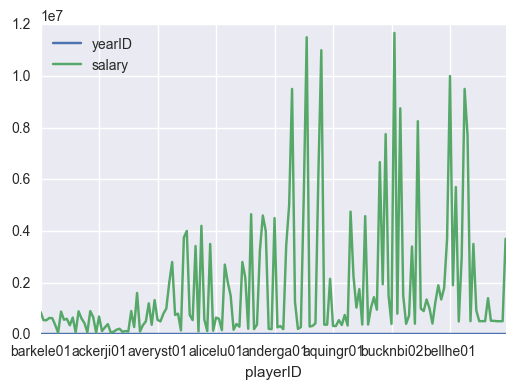

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

salaries = pd.read_csv('Salaries.csv',index_col='playerID')
hallOfFame = pd.read_csv('HallOfFame.csv', index_col='playerID')

%pylab inline

salaries.groupby('yearID').head().plot()